# Multiple Linear Regression

<img src='q.png' />


<img src='w.png' />



<img src='e.png' />

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

In [2]:
df = pd.read_csv('datasets/IPL2013.csv')

df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
xfeatures = df.columns
xfeatures

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [5]:
xfeatures = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

# Feature encoding on categorical columns

In [6]:
df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [7]:
pd.get_dummies(df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [8]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

encoded_df = pd.get_dummies(df[xfeatures],
                           columns = categorical_features,
                           drop_first=True)

encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [9]:
xfeatures = encoded_df.columns

encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

x = sm.add_constant(encoded_df)

y = df['SOLD PRICE']

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                               train_size=0.8,
                                               random_state=101)

In [11]:
model1 = sm.OLS(ytrain, xtrain).fit()

model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.367     
Dependent Variable:        SOLD PRICE              AIC:                       2952.4618 
Date:                      2023-04-20 21:55        BIC:                       3034.4379 
No. Observations:          104                     Log-Likelihood:            -1445.2   
Df Model:                  30                      F-statistic:               2.989     
Df Residuals:              73                      Prob (F-statistic):        7.43e-05  
R-squared:                 0.551                   Scale:                     9.8071e+10
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   321792.1559 214961.4272  1.4970 0.1387 -106625.3506  750209.6624
T-RUNS                     -15.3217     31.7900 -0.4820 0.6313     -78.6790      48.0356
T-WKTS                     -92.1211    532.7482 -0.1729 0.8632   -1153.8869     969.6446
ODI-RUNS-S                  46.4615     32.7116  1.4203 0.1598     -18.7326     111.6555
ODI-SR-B                  1254.6514   1524.3920  0.8231 0.4132   -1783.4575    4292.7602
ODI-WKTS                  1034.2327    705.8108  1.4653 0.1471    -372.4462    2440.9116
ODI-SR-BL                -1951.6835   1570.2876 -1.2429 0.2179   -5081.2621    1177.8952
RUNS-S                      79.5617    164.1206  0.4848 0.6293    -247.5303     406.6536
HS                       -2845.5968   2659.2674 -1.0701 0.2881   -8145.5090    2454.3155
AVE                      16170.0170   7116.7912  2.2721 0.0260    1986.2726   30353.7615
SR-B                     -1412.9785   1268.6500 -1.1138 0.2690   -3941.3943    1115.4373
SIXERS                    2933.8502   3250.6472  0.9025 0.3697   -3544.6804    9412.3808
RUNS-C                      90.3731    250.6836  0.3605 0.7195    -409.2387     589.9848
WKTS                      1023.5083   6199.6413  0.1651 0.8693  -11332.3589   13379.3755
AVE-BL                   10484.2466  10614.6012  0.9877 0.3266  -10670.6230   31639.1163
ECON                      1582.7941  10799.9290  0.1466 0.8839  -19941.4334   23107.0217
SR-BL                   -16112.2676  14683.6651 -1.0973 0.2761  -45376.7699   13152.2347
AGE_2                  -204982.5473 122684.6949 -1.6708 0.0990 -449492.7915   39527.6970
AGE_3                  -314011.4605 166581.1800 -1.8850 0.0634 -646007.2734   17984.3525
COUNTRY_BAN                 -0.0000      0.0000 -0.4054 0.6864      -0.0000       0.0000
COUNTRY_ENG             568937.2590 223554.3597  2.5450 0.0130  123394.0628 1014480.4552
COUNTRY_IND             105574.3654 116110.3502  0.9093 0.3662 -125833.2288  336981.9597
COUNTRY_NZ              120771.0634 169814.2346  0.7112 0.4792 -217668.2181  459210.3449
COUNTRY_PAK             -18339.1812 162409.9584 -0.1129 0.9104 -342021.7614  305343.3991
COUNTRY_SA              -48587.6579 135853.6982 -0.3576 0.7216 -319343.6880  222168.3722
COUNTRY_SL             -132932.0463 156295.0094 -0.8505 0.3978 -444427.5507  178563.4581
COUNTRY_WI             -292568.4951 188284.0245 -1.5539 0.1245 -667818.0146   82681.0244
COUNTRY_ZIM             -70610.1889 377372.9760 -0.1871 0.8521 -822713.4453  681493.0676
PLAYING ROLE_Batsman     45944.5780 131655.5496  0.3490 0.7281 -216444.5538  308333.7098
PLAYING ROLE_Bowler     103751.1060 110824.6388  0.9362 0.3523 -117122.0806  324624.2926
PLAYING ROLE_W. Keeper  -89731.6479 187093.4020 -0.4796 0.6329 -462608.2602  283144.9645
CAPTAINCY EXP_1          71431.5146 116029.1349  0.6156 0.5401 -159814.2177  302677.2470
----------------------------------------------------------------

In [ ]:
p-value

95%     5%
0.95    0.05<p

# multicollinearity

<img src='ee.png' />


# VIF (Variance Inflation Factor)

<img src='rr.png' />

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_score(x):
    
    xmatrix = x.values
    vif = [variance_inflation_factor(xmatrix, i) for i in range(xmatrix.shape[1])]
    
    vif_factor = pd.DataFrame()
    vif_factor['Column'] = x.columns
    vif_factor['VIF'] = vif
    
    return vif_factor

In [13]:
vif_factor = get_vif_score(x[xfeatures])

vif_factor

,Column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [14]:
columns_with_large_vif = vif_factor[vif_factor.VIF > 4].Column

In [15]:
x[columns_with_large_vif].corr()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,COUNTRY_IND,PLAYING ROLE_Batsman,CAPTAINCY EXP_1
T-RUNS,1.000000,0.026285,0.892823,0.231411,0.045505,0.067700,0.410143,0.411209,0.374046,0.114298,0.216571,-0.253083,-0.277157,-0.298999,-0.329022,-0.309105,-0.266649,-0.179278,0.384422,0.690647
T-WKTS,0.026285,1.000000,-0.088276,0.012052,0.822940,0.060641,-0.218544,-0.268432,-0.265540,-0.147752,-0.198036,0.297302,0.289735,0.162456,0.117530,0.205208,-0.178391,-0.147490,-0.276450,0.088782
ODI-RUNS-S,0.892823,-0.088276,1.000000,0.319264,0.056554,0.126795,0.523955,0.495765,0.446280,0.194111,0.376012,-0.268950,-0.302745,-0.225109,-0.249795,-0.237517,-0.242422,-0.168224,0.367995,0.714058
ODI-SR-B,0.231411,0.012052,0.319264,1.000000,0.160114,0.284584,0.306338,0.360086,0.340327,0.375371,0.320041,0.004855,-0.022502,0.018958,-0.019067,0.017522,-0.011977,-0.168609,0.083485,0.291373
ODI-WKTS,0.045505,0.822940,0.056554,0.160114,1.000000,0.124361,-0.198101,-0.209109,-0.222062,-0.030404,-0.148722,0.327122,0.302466,0.217302,0.230221,0.259800,-0.125708,-0.187669,-0.358824,0.077536
ODI-SR-BL,0.067700,0.060641,0.126795,0.284584,0.124361,1.000000,-0.027772,-0.067615,-0.053766,-0.051684,-0.033616,0.196887,0.151594,0.416627,0.313295,0.402495,-0.133908,-0.022494,-0.014689,0.103315
RUNS-S,0.410143,-0.218544,0.523955,0.306338,-0.198101,-0.027772,1.000000,0.834631,0.767023,0.380022,0.866213,-0.160762,-0.220959,-0.101818,-0.179459,-0.118567,-0.085762,0.209292,0.418555,0.352422
HS,0.411209,-0.268432,0.495765,0.360086,-0.209109,-0.067615,0.834631,1.000000,0.876249,0.531028,0.788439,-0.235327,-0.291494,-0.176049,-0.254494,-0.192990,-0.022883,-0.034029,0.408826,0.392749
AVE,0.374046,-0.265540,0.446280,0.340327,-0.222062,-0.053766,0.767023,0.876249,1.000000,0.583579,0.705365,-0.278482,-0.343958,-0.120430,-0.202301,-0.140809,0.031758,-0.037809,0.432485,0.378271
SR-B,0.114298,-0.147752,0.194111,0.375371,-0.030404,-0.051684,0.380022,0.531028,0.583579,1.000000,0.425394,-0.063179,-0.069823,-0.057895,-0.076228,-0.068248,0.181181,-0.049031,0.157903,0.176919


Text(0.5, 1.0, 'Correlation between Features')

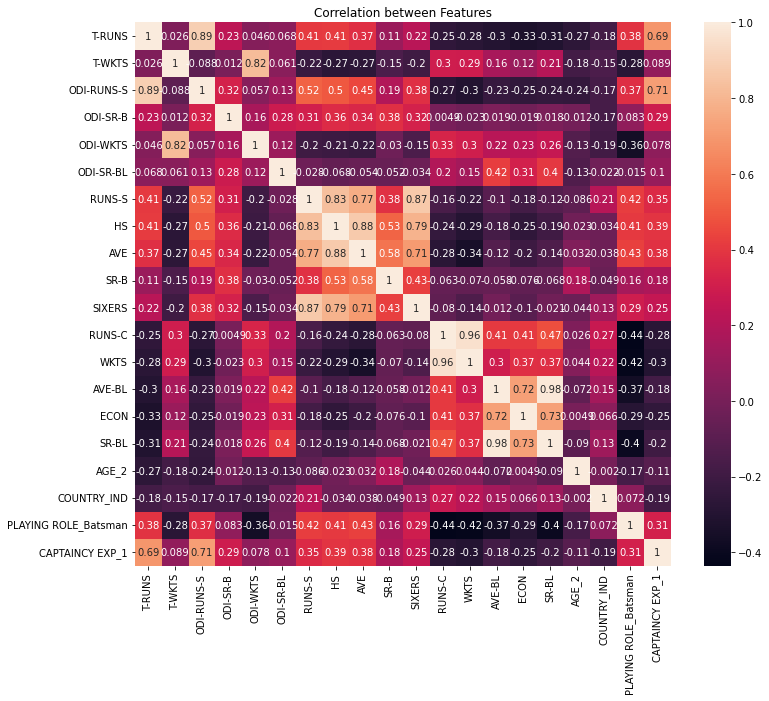

In [16]:
# correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))

sns.heatmap(x[columns_with_large_vif].corr(), annot=True)

plt.title("Correlation between Features")